# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
%matplotlib inline
import scipy.stats as stats
import pylab 

In [17]:
import pandas as pd

df = pd.read_csv('C:\DataScince\Dsc_human_temp\EDA_human_temperature\data\human_body_temperature.csv')

In [18]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


# 1.  Is the distribution of body temperatures normal? 

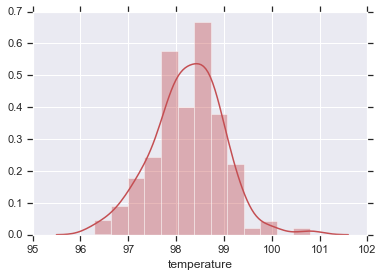

In [19]:
# create distribution plot using distplot
sns.set()
sns.distplot(df['temperature'],color='r')
plt.show()

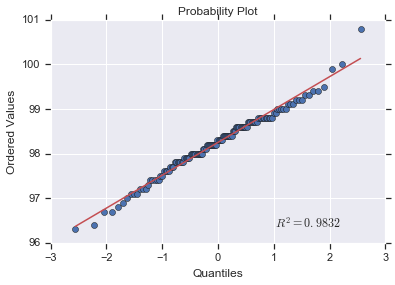

In [20]:
stats.probplot(df['temperature'], dist="norm", plot=pylab)
pylab.show()

In [21]:
#ECDF function
def ecdf(data):
    """compute ECDF"""
    n=len(data)
    x =np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

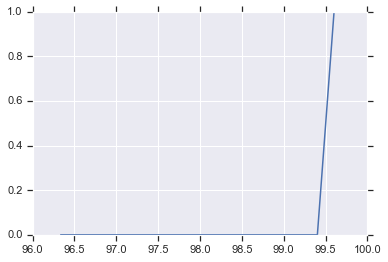

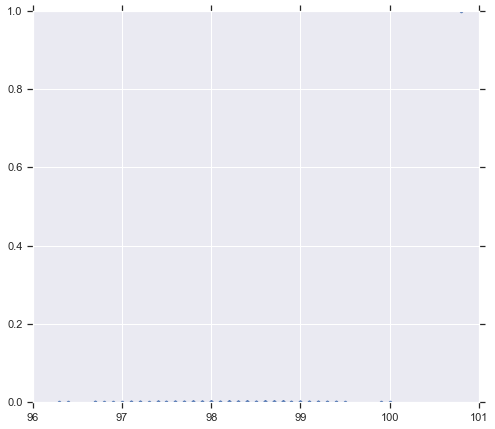

In [22]:
# checking normility using hacker staticks 
mean=np.mean(df['temperature'])
std=np.std(df['temperature'])
np.random.seed(42)
samples= np.random.normal(mean,std,size=100)
x,y = ecdf(df['temperature'])
x_t,y_t =ecdf(samples)
_=plt.plot(x_t,y_t)
plt.figure(figsize=(8,7))
plt.plot(x,y, marker='.',linestyle='none')
plt.show()


In [23]:
print(stats.normaltest(df["temperature"]))

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


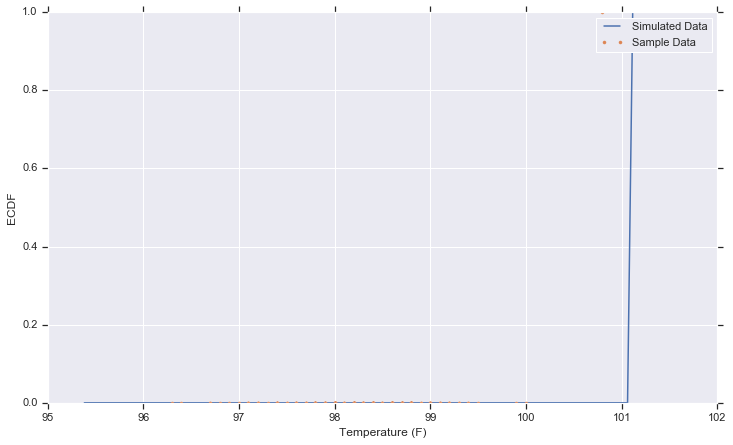

In [24]:
mu=np.mean(df['temperature'])
sigma=np.std(df['temperature'])
x_simulated,y_simulated = ecdf(np.random.normal(mu,sigma,size = 10000))
# ECDF of sample temperature data
x_sample,y_sample = ecdf(df['temperature'].values)
# Plot the two ECDF results to compare the KS test results
plt.figure(figsize=(12, 7))
plt.plot(x_simulated,y_simulated)
plt.plot(x_sample,y_sample,marker = '.', linestyle = 'none')
plt.legend(['Simulated Data', 'Sample Data'])
plt.ylabel('ECDF')
plt.xlabel('Temperature (F)')
plt.show()


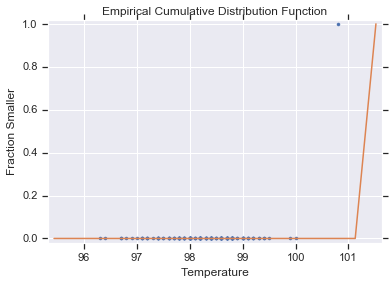

In [25]:
temp = df['temperature'].values
x,y = ecdf(temp)
_ = plt.plot(x,y,marker = '.',linestyle='none')
plt.margins(.02) # Keep data 2% away from edges
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Fraction Smaller')
_ = plt.title('Empirical Cumulative Distribution Function')
sample_mean = np.mean(temp)
sample_std = np.std(temp)
samples = np.random.normal(sample_mean,sample_std, size = 10000)
x_theor,y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)

In [26]:
df['temperature']

0       99.3
1       98.4
2       97.8
3       99.2
4       98.0
5       99.2
6       98.0
7       98.8
8       98.4
9       98.6
10      98.8
11      96.7
12      98.2
13      98.7
14      97.8
15      98.8
16      98.3
17      98.2
18      97.2
19      99.4
20      98.3
21      98.2
22      98.6
23      98.4
24      97.8
25      98.0
26      97.8
27      98.2
28      98.4
29      98.1
       ...  
100     99.0
101     98.5
102     98.0
103     99.4
104     97.6
105     96.7
106     97.0
107     98.6
108     98.7
109     97.3
110     98.8
111     98.0
112     98.2
113     99.1
114     99.0
115     98.0
116    100.8
117     97.8
118     98.7
119     98.4
120     97.7
121     97.9
122     99.0
123     97.2
124     97.5
125     96.3
126     97.7
127     98.2
128     97.9
129     98.7
Name: temperature, dtype: float64

In [28]:
import matplotlib
matplotlib.__version__

'1.5.1'

In [29]:
import seaborn
seaborn.__version__

'0.9.0'